In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

df = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')


In [14]:
# Stopwords list download
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dmitr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Text preprocess funk
def preprocess_text(text):
    # Text tokenization
    word_tokens = word_tokenize(text)

    # Punctuation removing
    table = str.maketrans('', '', string.punctuation)
    word_tokens = [word.translate(table) for word in word_tokens]

    # Stopword removing
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]

    return ' '.join(filtered_text)

In [16]:
df = df[['UserName', 'OriginalTweet']]
df.columns
# preprocessing text
df['OriginalTweet'] = df['OriginalTweet'].apply(preprocess_text)

In [17]:
# Text vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Змініть ngram_range для різних n-gram
X = vectorizer.fit_transform(df['OriginalTweet'])

In [18]:
words = vectorizer.get_feature_names()

# Average TF-IDF for every word
tfidf = X.mean(axis=0)

In [19]:
# Dictionary for WordCloud creation
wordcloud_dict = {words[i]: tfidf[0, i] for i in range(tfidf.shape[1])}

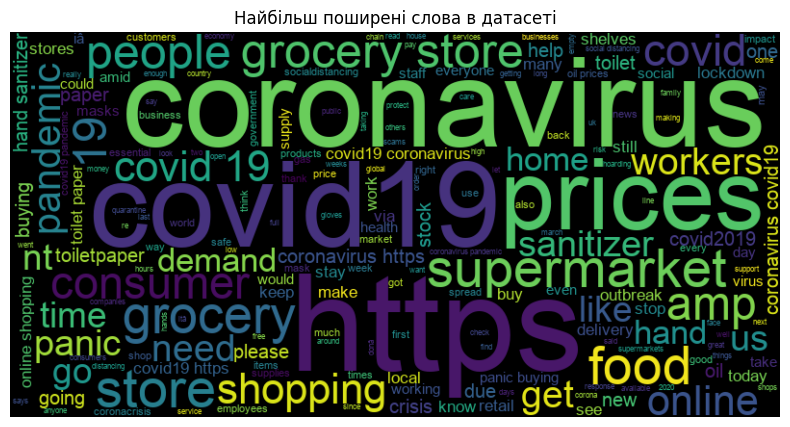

In [20]:
# WordCloud creation and displaying
wordcloud = WordCloud(width=800, height=400, font_path='arial.ttf').generate_from_frequencies(wordcloud_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Найбільш поширені слова в датасеті')
plt.show()